In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [3]:
# Chemins vers les dossiers contenant les images
varroas_folder = "base/varroas_crop_20/"
non_varroas_folder = "base/non_varroas_crop_20/"
#varroas_folder = "D:/base/varroas_crop_20/"
#non_varroas_folder = "D:/base/non_varroas_crop_20/"


# Récupération des chemins des images dans chaque dossier
varroas_images = [os.path.join(varroas_folder, image_file) for image_file in os.listdir(varroas_folder)]
non_varroas_images = [os.path.join(non_varroas_folder, image_file) for image_file in os.listdir(non_varroas_folder)]

# Labels correspondants pour chaque classe
varroas_labels = [0] * len(varroas_images)  # Classe 0 pour les varroas
non_varroas_labels = [1] * len(non_varroas_images)  # Classe 1 pour les non-varroas

# Concaténation des données et des labels
images = varroas_images + non_varroas_images
labels = varroas_labels + non_varroas_labels

# Convertir les images en tableaux et les redimensionner si nécessaire
resized_images = []
for image_path in images:
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (11, 11))  # dimensions souhaitées
    resized_images.append(resized_image)

# Convertir la liste en tableau numpy
X = np.array(resized_images)
y = np.array(labels)
print(y)
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[0 0 0 ... 1 1 1]


In [4]:
# Check if classes are balanced
import numpy as np

# Assuming y_train and y_test are NumPy arrays
train_class_counts = np.unique(y_train, return_counts=True)[1]
test_class_counts = np.unique(y_test, return_counts=True)[1]

# Check if classes are balanced in the training set
is_train_balanced = np.min(train_class_counts) / np.max(train_class_counts) >= 0.9

# Check if classes are balanced in the testing set
is_test_balanced = np.min(test_class_counts) / np.max(test_class_counts) >= 0.9

# Print the result
print("Training set balanced:", is_train_balanced)
print("Testing set balanced:", is_test_balanced)

Training set balanced: True
Testing set balanced: True


In [32]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

EPOCH = [10]
BATCH_SIZE = [100]

hyperMatrix = dict(epochs=EPOCH, batch_size=BATCH_SIZE)

def buildModel(optimizer="adam"):
    model = Sequential()
    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(11,11,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=buildModel, verbose=1)

grid = GridSearchCV(estimator=model, param_grid=hyperMatrix)

# Start training
history = grid.fit(X_train, y_train)

print(history.best_params_)
print(history.best_score_ )


Epoch 1/10


C:\Users\mdesp\AppData\Local\Temp\ipykernel_8568\4107177022.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=buildModel, verbose=1)


98/98 [==============================] - 2s 10ms/step - loss: 0.6728 - accuracy: 0.9106
Epoch 2/10
98/98 [==============================] - 1s 10ms/step - loss: 0.0959 - accuracy: 0.9671
Epoch 3/10
98/98 [==============================] - 1s 8ms/step - loss: 0.0329 - accuracy: 0.9886
Epoch 4/10
98/98 [==============================] - 1s 8ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 5/10
98/98 [==============================] - 1s 8ms/step - loss: 0.0211 - accuracy: 0.9928
Epoch 6/10
98/98 [==============================] - 1s 7ms/step - loss: 0.0186 - accuracy: 0.9940
Epoch 7/10
98/98 [==============================] - 1s 7ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 8/10
98/98 [==============================] - 1s 8ms/step - loss: 0.0333 - accuracy: 0.9885
Epoch 9/10
98/98 [==============================] - 1s 7ms/step - loss: 0.0143 - accuracy: 0.9955
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9980
Epoch 1/10
98/98 [==========

In [5]:
print(history.best_params_)
print(history.best_score_ )

NameError: name 'history' is not defined

In [10]:
#Creating the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3) ,input_shape = (11,11,3),activation = 'relu'),  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

train_acc = []
train_mean_acc = []
train_std_acc = []

test_acc = []
test_mean_acc = []
test_std_acc = []

for rep in range(5):
    model.fit(X_train, y_train, epochs=20, batch_size=90,verbose=False)
    results = model.evaluate(X_train, y_train)
    print(f"Metrics on training set for run {rep+1}: loss={results[0]}, accuracy={results[1]}" )
    train_acc.append(results[1])
    train_mean_acc.append(np.mean(train_acc))
    train_std_acc.append(np.std(train_acc))

    results_test = model.evaluate(X_test, y_test)
    print(f"Metrics on test set for run {rep+1}: loss={results_test[0]}, accuracy={results_test[1]}" )
    test_acc.append(results[1])
    test_mean_acc.append(np.mean(test_acc))
    test_std_acc.append(np.std(test_acc))


print('train mean accuracy = ', np.mean(train_acc))
print('train std accuracy  = ', np.std(train_acc))
print('test mean accuracy = ', np.mean(test_acc))
print('test std accuracy  = ', np.std(test_acc))

305/305 [==============================] - 1s 1ms/step - loss: 0.0043 - accuracy: 0.9987
Metrics on training set for run 1: loss=0.004276394844055176, accuracy=0.9986680150032043
131/131 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9959
Metrics on test set for run 1: loss=0.01701175980269909, accuracy=0.995936930179596
305/305 [==============================] - 0s 1ms/step - loss: 8.4696e-04 - accuracy: 0.9999
Metrics on training set for run 2: loss=0.0008469565073028207, accuracy=0.9998975396156311
131/131 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9964
Metrics on test set for run 2: loss=0.02474738098680973, accuracy=0.9964148998260498
305/305 [==============================] - 1s 2ms/step - loss: 0.0095 - accuracy: 0.9969
Metrics on training set for run 3: loss=0.009461906738579273, accuracy=0.9969262480735779
131/131 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9940
Metrics on test set fo

In [5]:
from keras.utils.vis_utils import plot_model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 64)          1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1

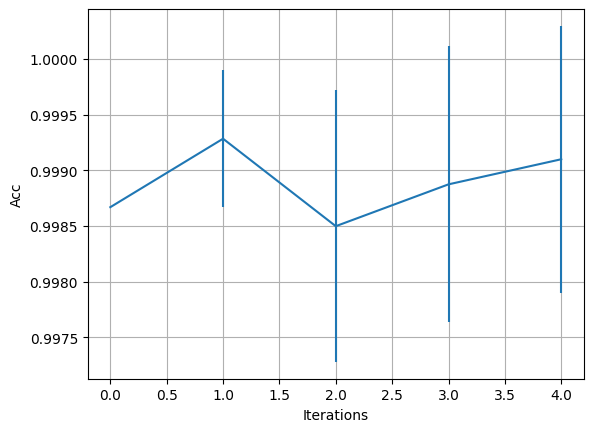

In [11]:
fig, ax = plt.subplots()
ax.errorbar(range(5), train_mean_acc, train_std_acc)
plt.xlabel('Iterations')
plt.ylabel('Acc')
plt.grid()
plt.show()

## Metrics

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have trained the Sequential model and have X_train, y_train

# Predict labels for training data
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred >= 0.5).astype(int)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_cm = confusion_matrix(y_train, y_train_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-Score:", train_f1)
print("Training Confusion Matrix:")
print(train_cm)

305/305 [==============================] - 0s 1ms/step
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1-Score: 1.0
Training Confusion Matrix:
[[4899    0]
 [   0 4861]]


In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have trained the Sequential model and have X_test, y_test

# Predict labels for test data
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred >= 0.5).astype(int)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_cm = confusion_matrix(y_test, y_test_pred)

# Print the results
print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1-Score:", test_f1)
print("Testing Confusion Matrix:")
print(test_cm)

131/131 [==============================] - 0s 1ms/step
Testing Accuracy: 0.9973709369024857
Testing Precision: 0.9973764265446978
Testing Recall: 0.9973709369024857
Testing F1-Score: 0.9973708895897074
Testing Confusion Matrix:
[[2064    9]
 [   2 2109]]


In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

131/131 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9974
Test accuracy: 0.9973709583282471


131/131 [==============================] - 0s 1ms/step


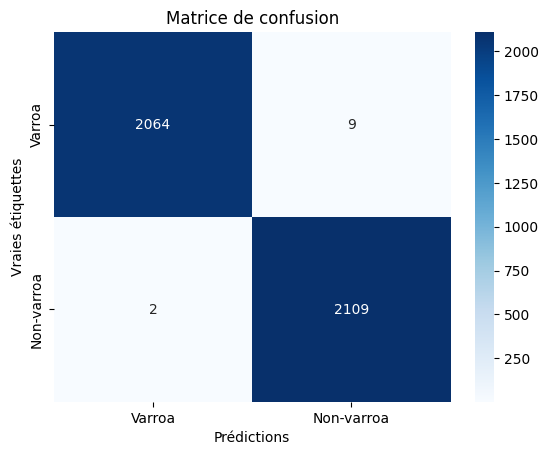

In [15]:
# Supposez que vous avez entraîné votre modèle et obtenu les prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

y_pred_binary = (y_pred >= 0.5).astype(int)

# Créer la matrice de confusion
confusion_matrix = confusion_matrix(y_test, y_pred_binary)

# Définir les étiquettes de classe
class_labels = ['Varroa', 'Non-varroa']  # Remplacez les noms des classes par les vôtres

# Créer une heatmap de la matrice de confusion
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Ajouter des étiquettes d'axe et un titre
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')

# Afficher la figure
plt.show()

    


131/131 [==============================] - 0s 1ms/step
Sans compétences : ROC AUC=0.500
Régression Logistique : ROC AUC=0.999


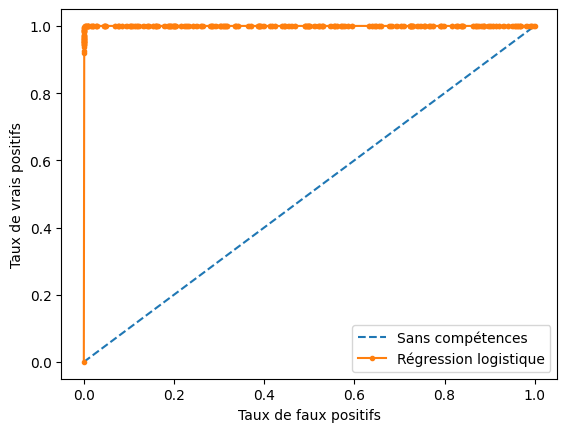

In [16]:
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = y_pred
# calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Sans compétences : ROC AUC=%.3f' % (ns_auc))
print('Régression Logistique : ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sans compétences')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Régression logistique')
# axis labels
pyplot.xlabel('Taux de faux positifs')
pyplot.ylabel('Taux de vrais positifs')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [20]:
model.save_weights("model.h5")


Saved model to disk


In [18]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

2.12.0-rc0
2.12.0
